<a href="https://colab.research.google.com/github/joelsoaresjr/python_strategies/blob/main/Long%26Short_algo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install yfinance

In [18]:
import pandas as pd
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from datetime import datetime

from statsmodels.tsa.stattools import adfuller

from sklearn.linear_model import LinearRegression

Função correlação - retornos


In [25]:
def ls_corr(start, end, periodo):


  ticker = []
  nomes = []
  for name in range(1,3):
    x = input(f"Digite o nome da ação {name}: ")
    nomes.append(x)
    ticker.append(x+".SA")

  
  df = yf.download(ticker, start, end)['Adj Close']


  df = df.pct_change()

  def correlacao(df, periodo):
    corr = df.iloc[: , 0].rolling(periodo).corr(df.iloc[:, 1])
    media = (df.iloc[: , 0].rolling(periodo).corr(df.iloc[:, 1])).mean()

    return corr, media

  corr_df, media_df = correlacao(df, periodo)

  resultado = adfuller(corr_df.dropna())

  if resultado[1]< 0.05:
    print('\n')
    print(  f'P-VALUE: {resultado[1]:.2%}' )
    print ('Menor que 5% => correlação é estacionária')
    print('\n')
  else:
    print('\n')
    print(  f'P-VALUE: {resultado[1]:.2%}' )
    print('ATENÇÃO!!! \n')
    print ('Maior que 5% => correlação não estacionária')
    print('\n')

  grafico = str(input('Deseja ver o gráfico da correlação? [S, N]\n'))
  if grafico == "S" or grafico == 's':

    fig = plt.figure(figsize= (18,9))

    titulo = f'Correlação nos ultimos {periodo:} dias'
    plt.title(titulo, 
              fontsize = 15)
    plt.plot(corr_df, label = 'Correlação')
    plt.axhline(media_df, color  = 'green', label = 'Média correlação')
    plt.legend()
  
  print('\n')
  trade = np.where(corr_df>media_df, 1, -1)


  acao1 = []
  acao2 = []


  for i in range(len(trade)):
    if i < (len(trade)-1):

      if trade[i] == -1:
        acao1.append(-df.iloc[i+1, 0])
        acao2.append(df.iloc[i+1, 1])
      else:
        acao1.append(df.iloc[i+1, 0])
        acao2.append(-df.iloc[i+1, 1])
    else: 
      break

  retorno_strag = pd.DataFrame(acao1, columns = [df.columns[0]], index = df[df.columns[0]].index[1:])
  retorno_strag[df.columns[1]] = acao2  


  lm_model= LinearRegression()
  lm_model.fit(df[df.columns[0]].dropna().values.reshape(-1,1), df[df.columns[1]].dropna().values)


  retorno_total = lm_model.coef_*retorno_strag[df.columns[0]] + retorno_strag[df.columns[1]]

  retorno_total_acum = (retorno_total+1).cumprod() 
  retorno_total_acum.iloc[0] = 1


  grafico2 = str(input('Deseja ver o gráfico do retorno acumulado? [S, N]\n'))
  
  if grafico2 == "S" or grafico2 == 's':
    
    print('\n')
    fig1 = plt.figure(figsize= (18,9))

    titulo2 = f'Retorno acumulado - Long & Short'
    plt.title(titulo2, 
              fontsize = 15)
    plt.plot(retorno_total_acum, label = 'Retorno', color = 'blue')
    plt.legend()
    print('\n')
    

  #retorno total
  return_total =  f'{retorno_total_acum.iloc[len(retorno_total_acum)-1]-1:.2%}'
  
  #retorno anualizado 
  return_anual = f'{retorno_total.mean() * 252:.2%}'
  vol_anual = f'{retorno_total.std() * np.sqrt(252) :.2%}'
  
  lista_retorno = [return_total ,return_anual, vol_anual]

  x = "L&S - Correlação"

  dic = {x: lista_retorno}

  df_retorno = pd.DataFrame(dic, index = ["Retorno total", "Retorno Anual", "Volatilidade anual"])

  return df_retorno




Digite o nome da ação 1: ITUB4
Digite o nome da ação 2: BBAS3
[*********************100%***********************]  2 of 2 completed


P-VALUE: 5.01%
ATENÇÃO!!! 

Maior que 5% => correlação não estacionária


Deseja ver o gráfico da correlação? [S, N]
S


Deseja ver o gráfico do retorno acumulado? [S, N]
S






,L&S - Correlação
Retorno total,-57.91%
Retorno Anual,-5.48%
Volatilidade anual,21.20%


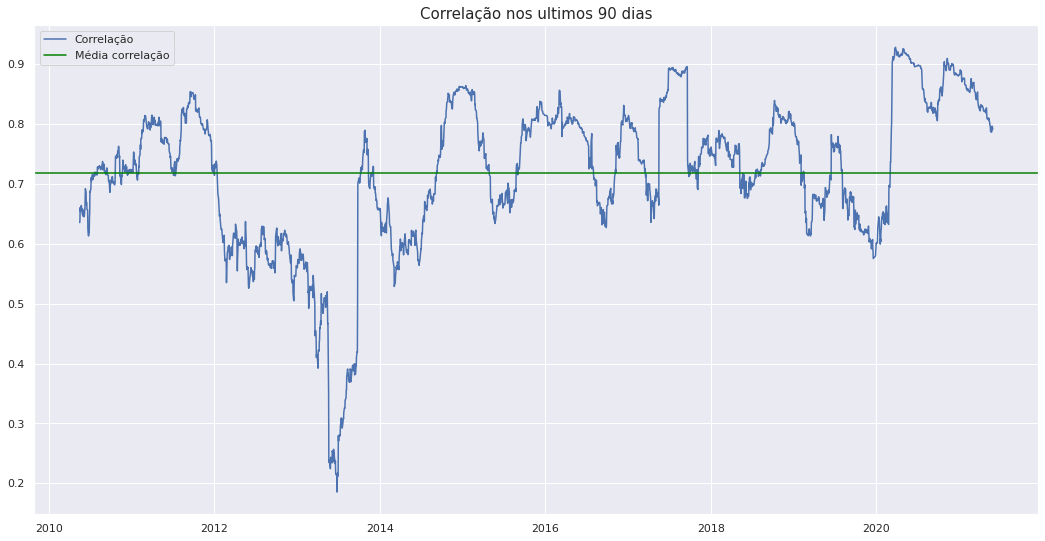

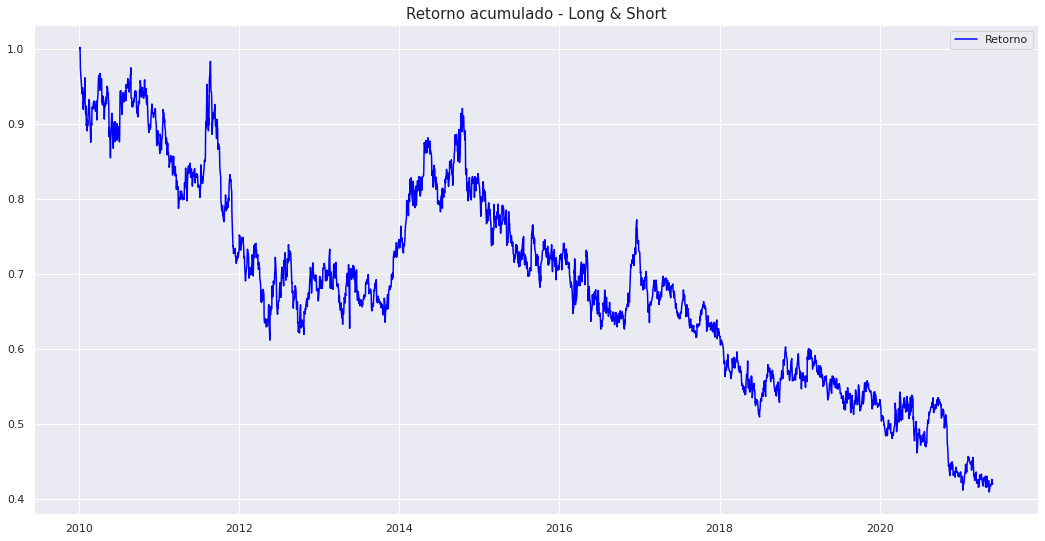

In [31]:
ls_corr('2010-01-01', '2021-06-01', 90)